In [1]:
### Import libraries
from datetime import datetime, timedelta

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic' # Matplotlib 한글서체 오류처리
plt.rc('axes', unicode_minus=False)

# !pip install yfinance
# import yfinance as yf  # Yahoo Finance API

# !pip install pykrx
# from pykrx import stock  # 네이버금융

# !pip install pandas-datareader # 주식 데이터 조회
import pandas_datareader as web

# !pip install mplfinance # 금융차트
import mplfinance as mpf
# 한국식 캔들차트 생성을 위한 스타일 지정 (상승-빨강, 하락-파랑)
colorset = mpf.make_marketcolors(up='tab:red', down='tab:blue', volume='tab:blue')
s = mpf.make_mpf_style(marketcolors= colorset)

In [2]:
# code: ['NAME', 'MARKET', 'STOCK', 'TYPE', 'MONITORING?']
tickerdict = {
    '005930': ['삼성전자', 'KR', 'stock', 'long', True],
    '000660': ['SK하이닉스', 'KR', 'stock', 'long', True],
    '035420': ['NAVER', 'KR', 'stock', 'long', True],
    '069500': ['KODEX 200', 'KR', 'index', 'long', True],
    '088980': ['맥쿼리인프라', 'KR', 'stock', 'long', True],
    '123310': ['TIGER 인버스', 'KR', 'index', 'short', False],
    '133690': ['TIGER 미국나스닥100', 'US', 'index', 'long', True],
    '139280': ['TIGER 경기방어', 'KR', 'sector', 'long', True],
    '157490': ['TIGER 소프트웨어', 'KR', 'sector', 'long', True],
    '169950': ['KODEX 차이나A50', 'Global', 'index', 'long', True],
    '195980': ['ARIRANG 신흥국MSCI(합성 H)', 'Global', 'index', 'long', True],
    '200250': ['KOSEF 인도Nifty50(합성)', 'Global', 'index', 'long', True],
    '218420': ['KODEX 미국S&P에너지(합성)', 'US', 'commodity', 'long', True],
    '219390': ['KBSTAR 미국S&P원유생산기업(합성 H)', 'US','commodity', 'long', True],
    '241180': ['TIGER 일본니케이225', 'JP', 'index', 'long', True],
    '256440': ['KINDEX 인도네시아MSCI(합성)', 'Global', 'index', 'long', True],
    '266410': ['KODEX 필수소비재', 'KR', 'sector', 'long', True],
    '269370': ['TIGER S&P글로벌인프라(합성)', 'US', 'sector', 'long', True],
    '271050': ['KODEX WTI원유선물인버스(H)', 'Global', 'commodity', 'short', False],
    '305540': ['TIGER 2차전지테마', 'KR', 'sector', 'long', True],
    '309230': ['KINDEX 미국WideMoat가치주', 'US', 'sector', 'long', True],
    '319640': ['TIGER 골드선물(H)',  'Global',  'commodity', 'long', True],
    '329200': ['TIGER 리츠부동산인프라', 'KR', 'RealEstate', 'long', True],
    '332610': ['ARIRANG 미국단기우량회사채', 'US',  'bond', 'long', True],
    '334690': ['KBSTAR 팔라듐선물(H)',  'Global',  'commodity', 'long', True],
    '360750': ['TIGER 미국S&P500', 'US', 'index', 'long', True],
    '360750': ['KBSTAR Fn수소경제테마', 'KR', 'sector', 'long', True],
    '371450': ['TIGER 글로벌클라우드컴퓨팅INDXX', 'US', 'sector', 'long', True],
    '371460': ['TIGER 차이나전기차SOLACTIVE', 'CN', 'sector', 'long', True],
    '373530': ['ARIRANG 신흥국MSCI인버스(합성 H)', 'Global', 'index', 'short', True],
    '373790': ['KOSEF 미국방어배당성장나스닥', 'US', 'sector', 'long', True],
    '394350': ['KOSEF 릭소글로벌퓨처모빌리티MSCI', 'Global', 'sector', 'long', True],
    '409810': ['KODEX 미국나스닥100선물인버스(H)', 'US', 'index', 'short', True],
    '411420': ['KODEX 미국메타버스나스닥액티브',  'US',  'sector', 'long', True],
    '500014': ['신한 인버스 옥수수 선물 ETN(H)',  'Global', 'commodity', 'long', True],
    '500058': ['신한 S&P500 VIX S/T 선물 ETN C', 'US', 'index', 'option', True],
    '510004': ['대신 인버스 아연선물 ETN(H)', 'Global', 'commodity', 'short', True],
    '510006': ['대신 인버스 니켈선물 ETN(H)', 'Global', 'commodity', 'short', True],
    '510018': ['대신 인버스 알루미늄 선물 ETN(H)', 'Global', 'commodity', 'short', True],
    '530020': ['삼성 미국 대형 가치주 ETN', 'US', 'sector', 'long', True],
    '570049': ['TRUE S&P500 양매도 4% OTM ETN(H)', 'US', 'index', 'option', True],
    '590018': ['미래에셋 중국 심천 100 ETN', 'CN', 'sector', 'long', True]
}

In [3]:
ticker = pd.DataFrame(tickerdict).T.reset_index()
ticker.columns = ['TICKER', 'NAME', 'MARKET', 'TYPE', 'POSITION', 'MONITOR']

ticker

,TICKER,NAME,MARKET,TYPE,POSITION,MONITOR
0,005930,삼성전자,KR,stock,long,True
1,000660,SK하이닉스,KR,stock,long,True
2,035420,NAVER,KR,stock,long,True
3,069500,KODEX 200,KR,index,long,True
4,088980,맥쿼리인프라,KR,stock,long,True
5,123310,TIGER 인버스,KR,index,short,False
6,133690,TIGER 미국나스닥100,US,index,long,True
7,139280,TIGER 경기방어,KR,sector,long,True
8,157490,TIGER 소프트웨어,KR,sector,long,True
9,169950,KODEX 차이나A50,Global,index,long,True


---------------------------------------------
최근 360 일 데이터 조회 - MA 20d, 50d
---------------------------------------------

** TIGER 리츠부동산인프라 **
Ticker  : 329200
Market  : KR
Type    : RealEstate
MEAN +/-: -4 %
MAX/MIN : 110 / 73
RANGE.  : 37
PV      : 79


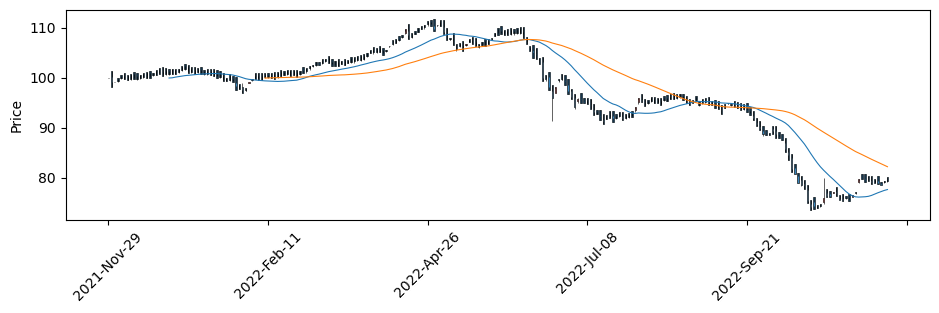

** ARIRANG 미국단기우량회사채 **
Ticker  : 332610
Market  : US
Type    : bond
MEAN +/-: 5 %
MAX/MIN : 116 / 98
RANGE.  : 18
PV      : 108


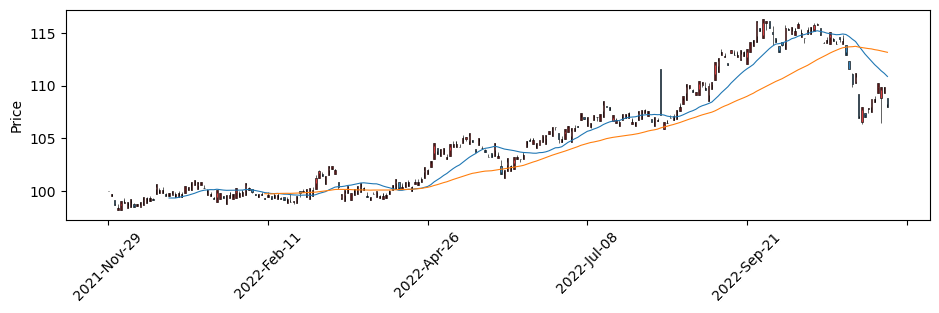

** TIGER 골드선물(H) **
Ticker  : 319640
Market  : Global
Type    : commodity
MEAN +/-: -1 %
MAX/MIN : 111 / 89
RANGE.  : 22
PV      : 96


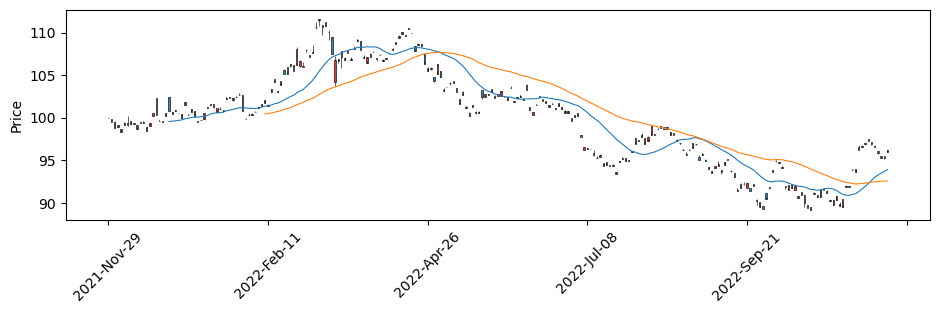

** KBSTAR 팔라듐선물(H) **
Ticker  : 334690
Market  : Global
Type    : commodity
MEAN +/-: 16 %
MAX/MIN : 176 / 91
RANGE.  : 85
PV      : 102


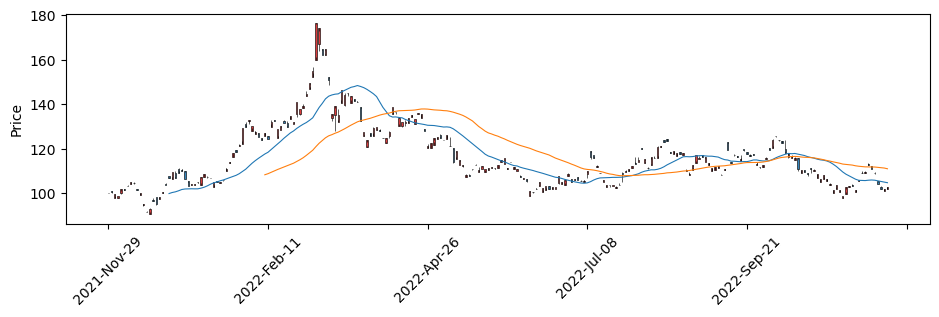

** 신한 인버스 옥수수 선물 ETN(H) **
Ticker  : 500014
Market  : Global
Type    : commodity
MEAN +/-: -18 %
MAX/MIN : 103 / 69
RANGE.  : 34
PV      : 79


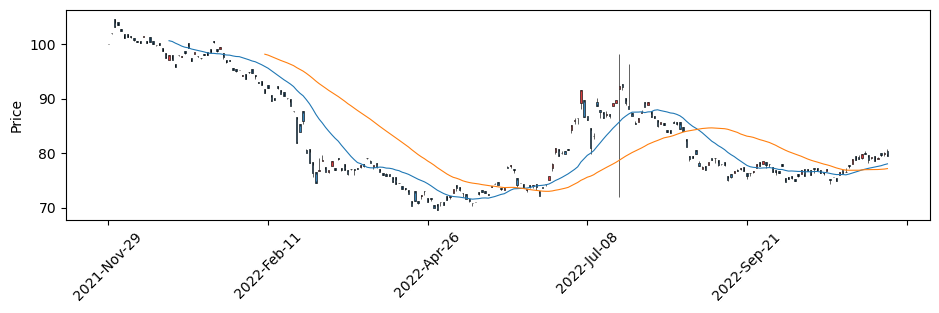

** 대신 인버스 아연선물 ETN(H) **
Ticker  : 510004
Market  : Global
Type    : commodity
MEAN +/-: -15 %
MAX/MIN : 103 / 63
RANGE.  : 40
PV      : 92


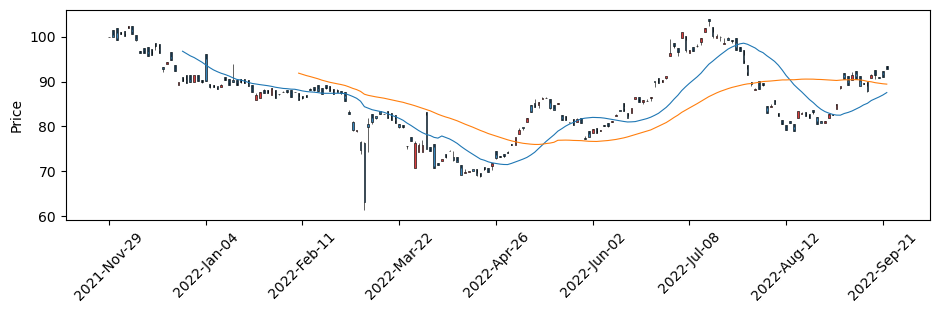

** 대신 인버스 니켈선물 ETN(H) **
Ticker  : 510006
Market  : Global
Type    : commodity
MEAN +/-: -44 %
MAX/MIN : 104 / 28
RANGE.  : 76
PV      : 37


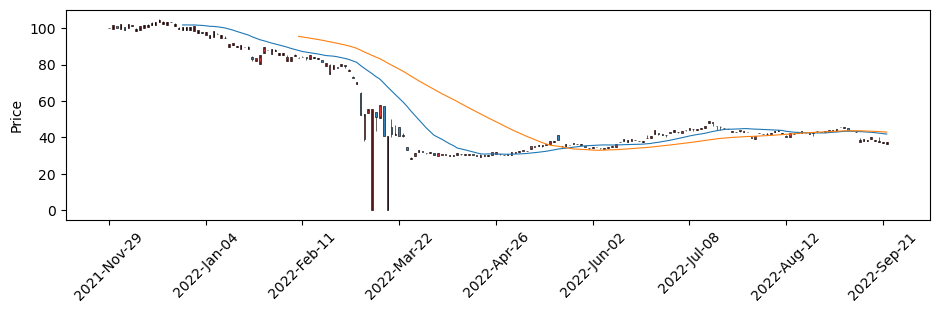

** 대신 인버스 알루미늄 선물 ETN(H) **
Ticker  : 510018
Market  : Global
Type    : commodity
MEAN +/-: -6 %
MAX/MIN : 120 / 64
RANGE.  : 56
PV      : 102


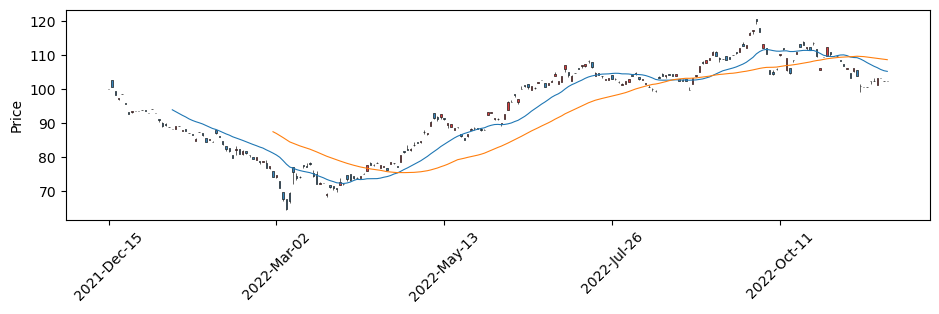

** KODEX 미국S&P에너지(합성) **
Ticker  : 218420
Market  : US
Type    : commodity
MEAN +/-: 42 %
MAX/MIN : 191 / 94
RANGE.  : 97
PV      : 181


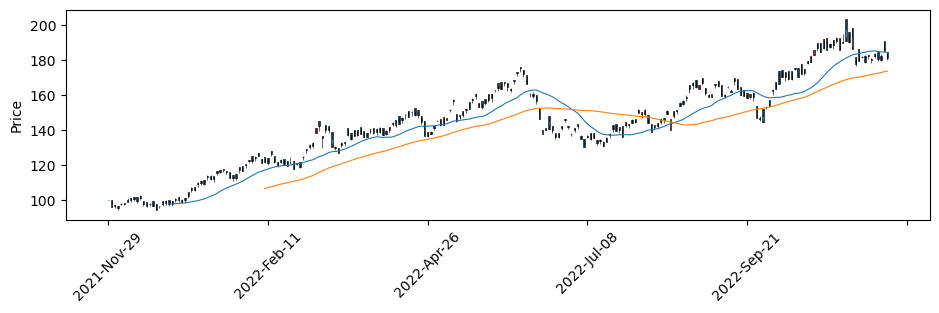

** KBSTAR 미국S&P원유생산기업(합성 H) **
Ticker  : 219390
Market  : US
Type    : commodity
MEAN +/-: 29 %
MAX/MIN : 173 / 92
RANGE.  : 81
PV      : 153


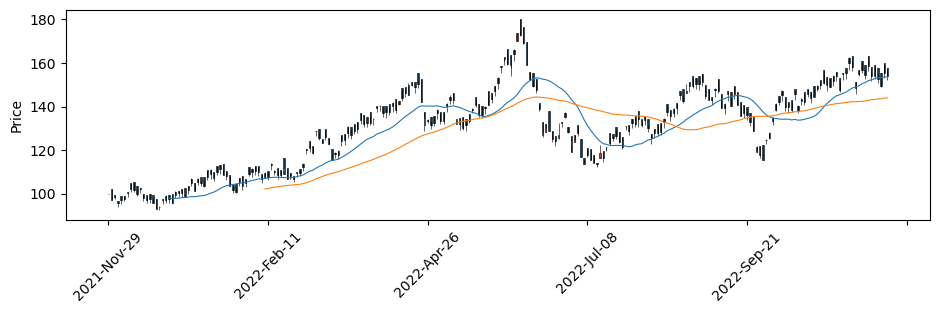

** KODEX 차이나A50 **
Ticker  : 169950
Market  : Global
Type    : index
MEAN +/-: -8 %
MAX/MIN : 106 / 77
RANGE.  : 29
PV      : 79


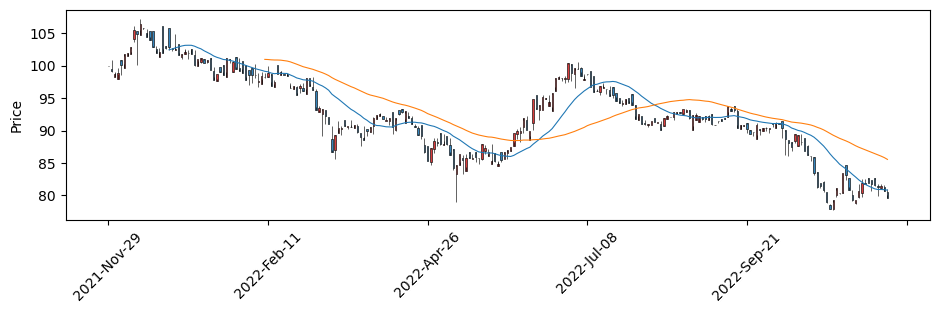

** ARIRANG 신흥국MSCI(합성 H) **
Ticker  : 195980
Market  : Global
Type    : index
MEAN +/-: -14 %
MAX/MIN : 103 / 67
RANGE.  : 36
PV      : 76


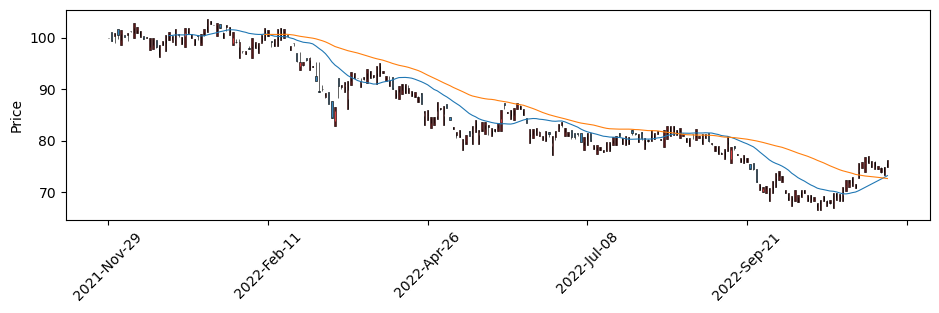

** KOSEF 인도Nifty50(합성) **
Ticker  : 200250
Market  : Global
Type    : index
MEAN +/-: 1 %
MAX/MIN : 112 / 90
RANGE.  : 22
PV      : 106


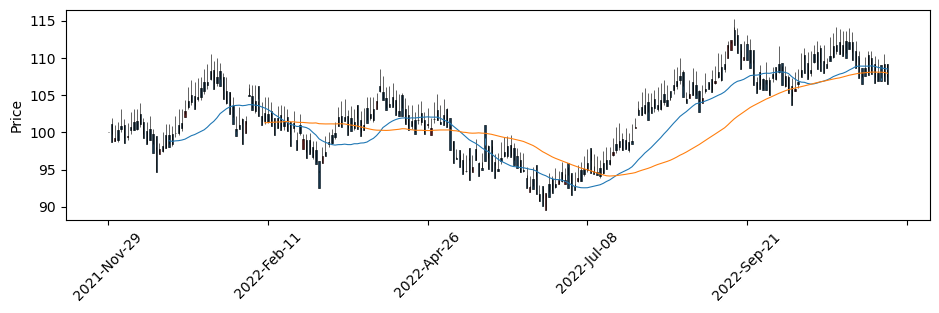

** KINDEX 인도네시아MSCI(합성) **
Ticker  : 256440
Market  : Global
Type    : index
MEAN +/-: 11 %
MAX/MIN : 129 / 98
RANGE.  : 31
PV      : 116


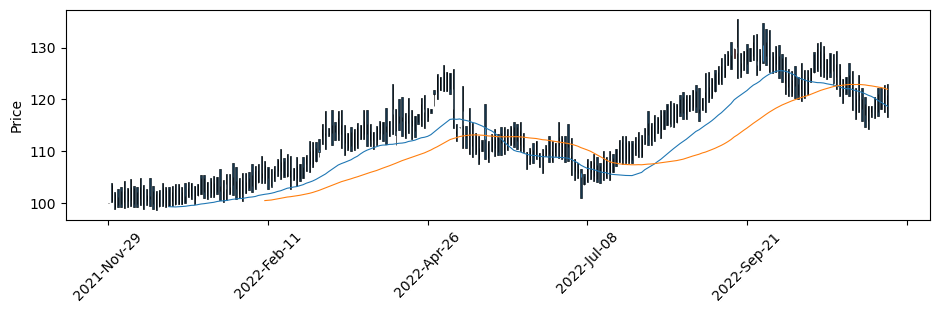

** ARIRANG 신흥국MSCI인버스(합성 H) **
Ticker  : 373530
Market  : Global
Type    : index
MEAN +/-: 11 %
MAX/MIN : 134 / 94
RANGE.  : 40
PV      : 121


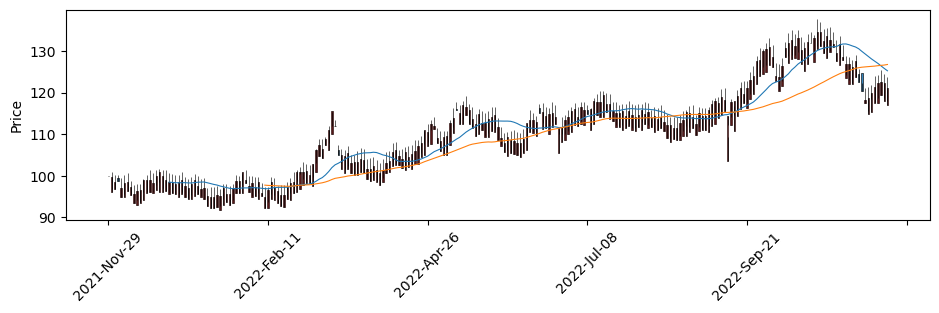

** TIGER 일본니케이225 **
Ticker  : 241180
Market  : JP
Type    : index
MEAN +/-: -9 %
MAX/MIN : 101 / 83
RANGE.  : 18
PV      : 92


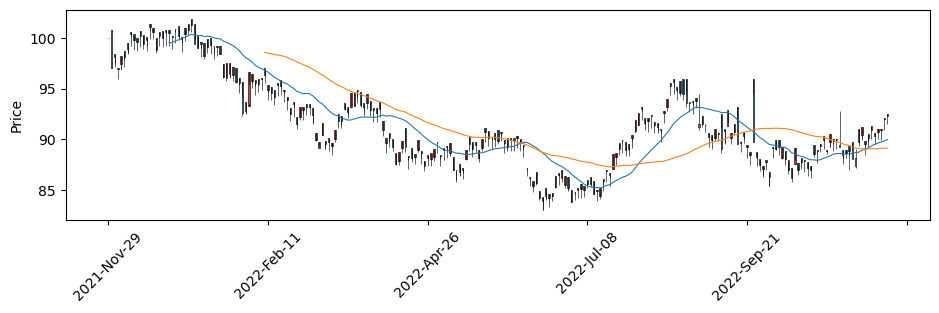

** KODEX 200 **
Ticker  : 069500
Market  : KR
Type    : index
MEAN +/-: -10 %
MAX/MIN : 105 / 75
RANGE.  : 30
PV      : 84


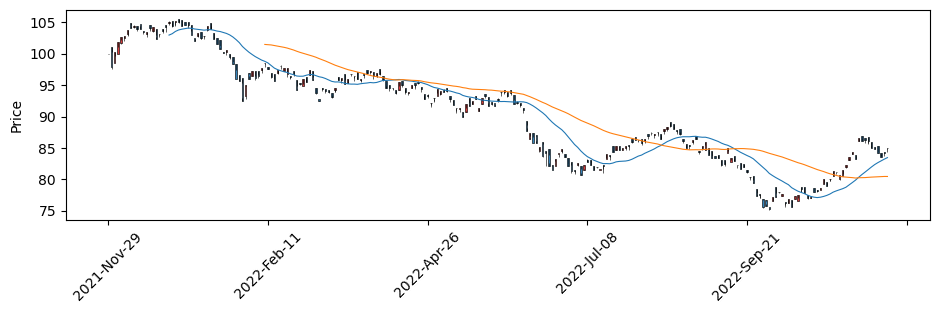

** TIGER 미국나스닥100 **
Ticker  : 133690
Market  : US
Type    : index
MEAN +/-: -13 %
MAX/MIN : 102 / 74
RANGE.  : 28
PV      : 81


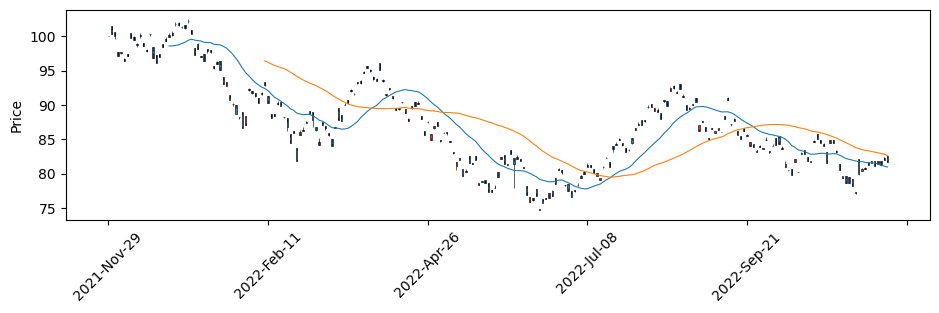

** 신한 S&P500 VIX S/T 선물 ETN C **
Ticker  : 500058
Market  : US
Type    : index
MEAN +/-: -7 %
MAX/MIN : 127 / 69
RANGE.  : 58
PV      : 69


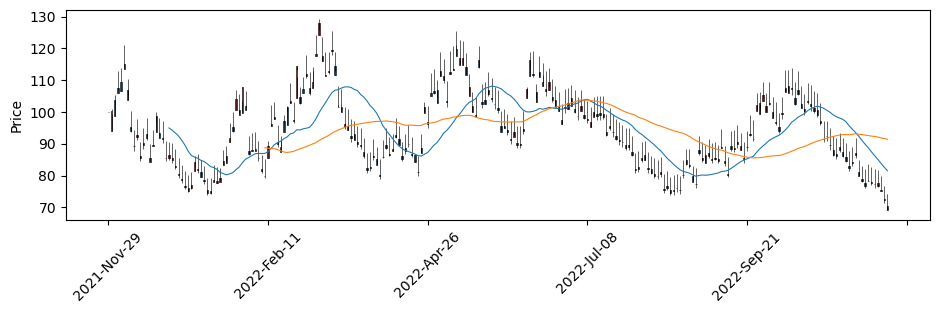

** TRUE S&P500 양매도 4% OTM ETN(H) **
Ticker  : 570049
Market  : US
Type    : index
MEAN +/-: 3 %
MAX/MIN : 109 / 97
RANGE.  : 12
PV      : 99


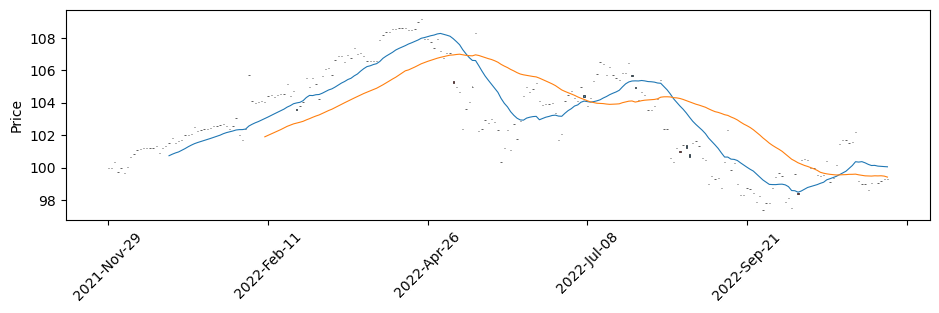

** KODEX 미국나스닥100선물인버스(H) **
Ticker  : 409810
Market  : US
Type    : index
MEAN +/-: 20 %
MAX/MIN : 140 / 98
RANGE.  : 42
PV      : 127


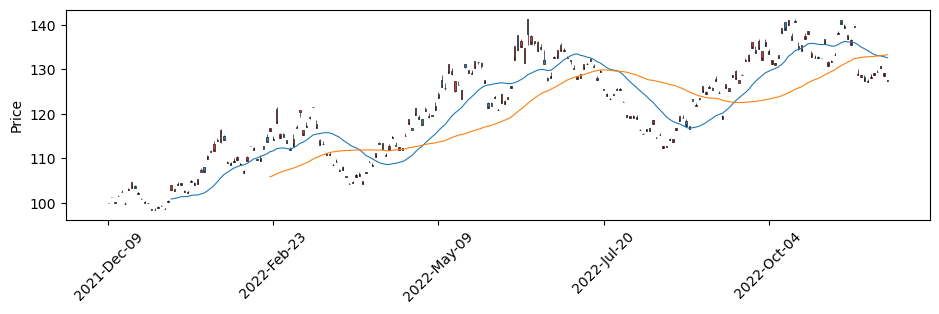

** TIGER 차이나전기차SOLACTIVE **
Ticker  : 371460
Market  : CN
Type    : sector
MEAN +/-: -25 %
MAX/MIN : 100 / 53
RANGE.  : 47
PV      : 61


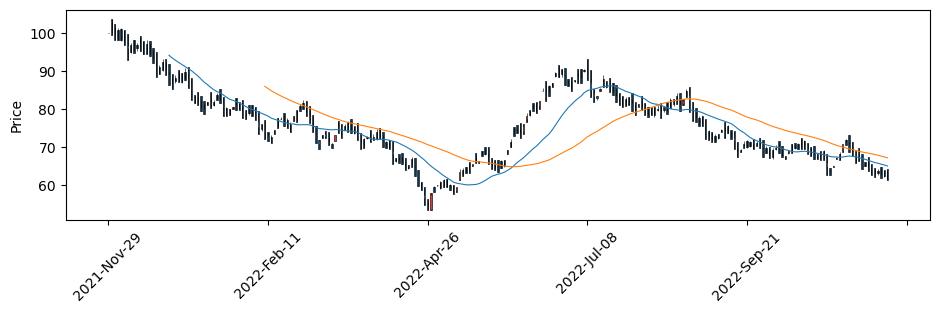

** 미래에셋 중국 심천 100 ETN **
Ticker  : 590018
Market  : CN
Type    : sector
MEAN +/-: -14 %
MAX/MIN : 103 / 72
RANGE.  : 31
PV      : 72


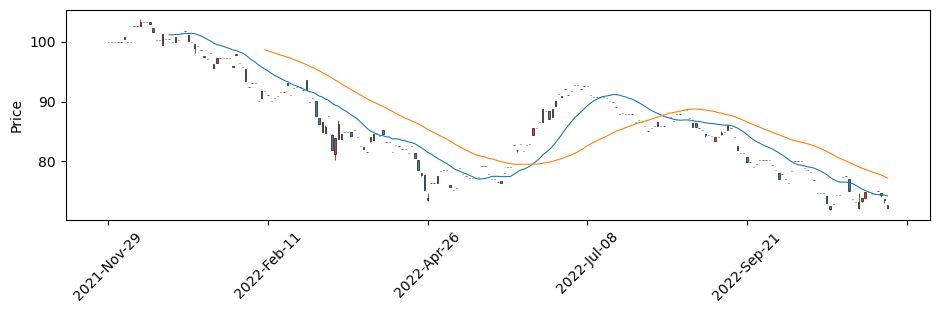

** KOSEF 릭소글로벌퓨처모빌리티MSCI **
Ticker  : 394350
Market  : Global
Type    : sector
MEAN +/-: -18 %
MAX/MIN : 100 / 72
RANGE.  : 28
PV      : 77


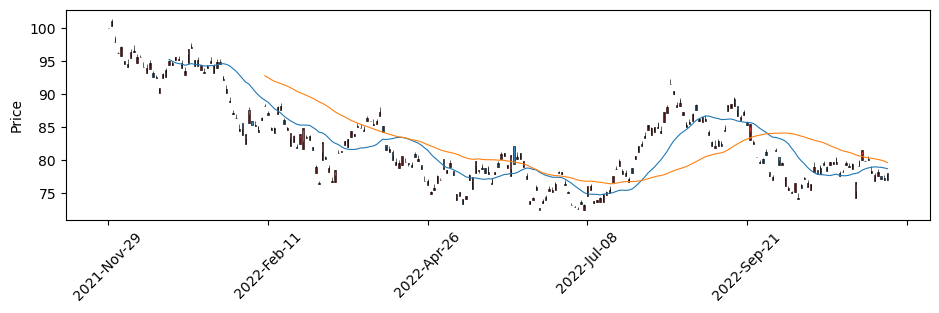

** TIGER 경기방어 **
Ticker  : 139280
Market  : KR
Type    : sector
MEAN +/-: -10 %
MAX/MIN : 102 / 78
RANGE.  : 24
PV      : 87


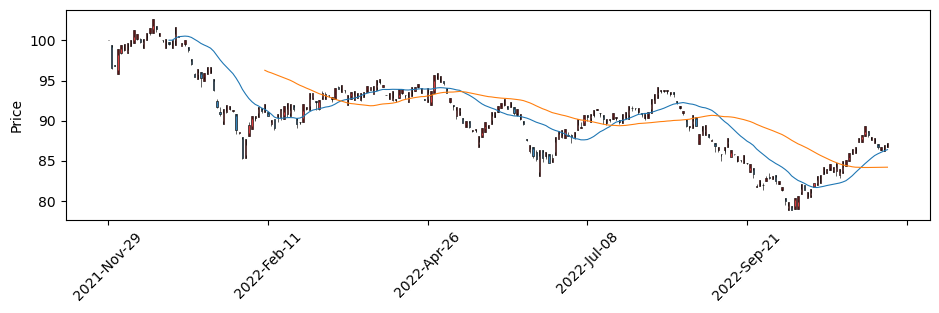

** TIGER 소프트웨어 **
Ticker  : 157490
Market  : KR
Type    : sector
MEAN +/-: -31 %
MAX/MIN : 102 / 44
RANGE.  : 58
PV      : 53


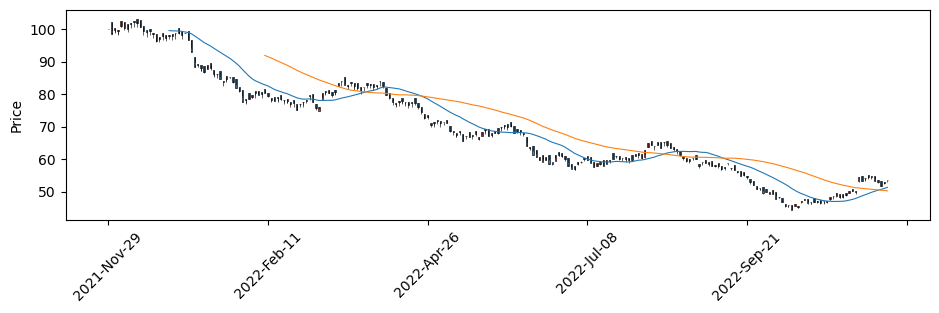

** KODEX 필수소비재 **
Ticker  : 266410
Market  : KR
Type    : sector
MEAN +/-: -7 %
MAX/MIN : 104 / 79
RANGE.  : 25
PV      : 88


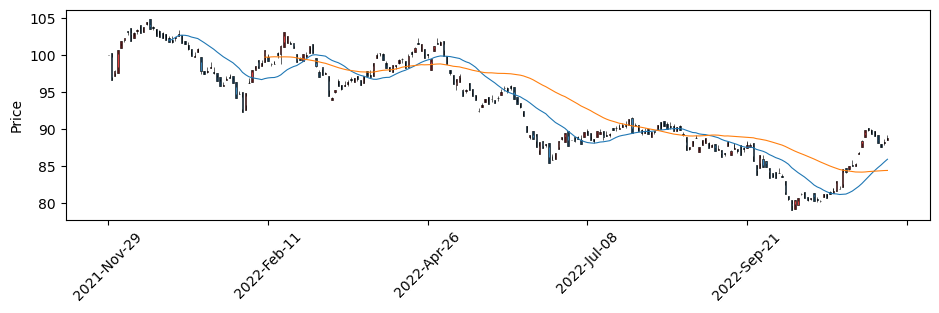

** TIGER 2차전지테마 **
Ticker  : 305540
Market  : KR
Type    : sector
MEAN +/-: -18 %
MAX/MIN : 100 / 67
RANGE.  : 33
PV      : 84


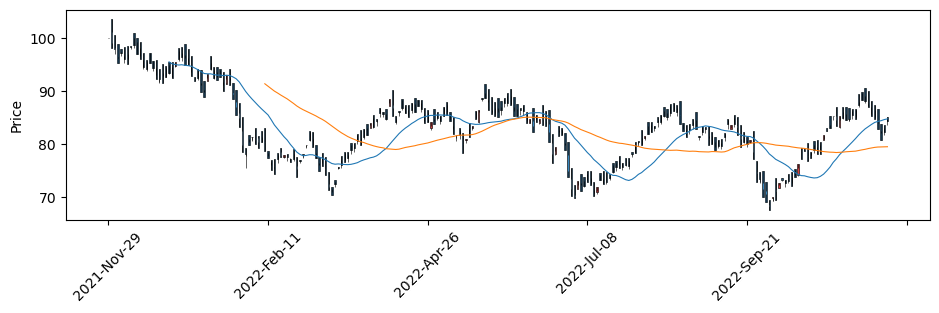

** KBSTAR Fn수소경제테마 **
Ticker  : 360750
Market  : KR
Type    : sector
MEAN +/-: -4 %
MAX/MIN : 103 / 86
RANGE.  : 17
PV      : 97


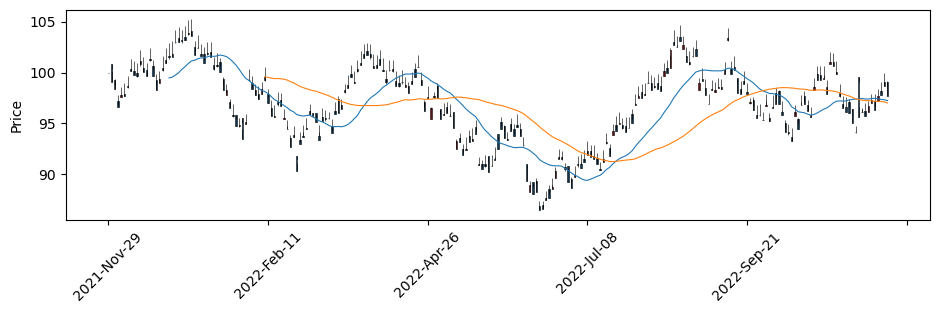

** TIGER S&P글로벌인프라(합성) **
Ticker  : 269370
Market  : US
Type    : sector
MEAN +/-: 10 %
MAX/MIN : 123 / 96
RANGE.  : 27
PV      : 114


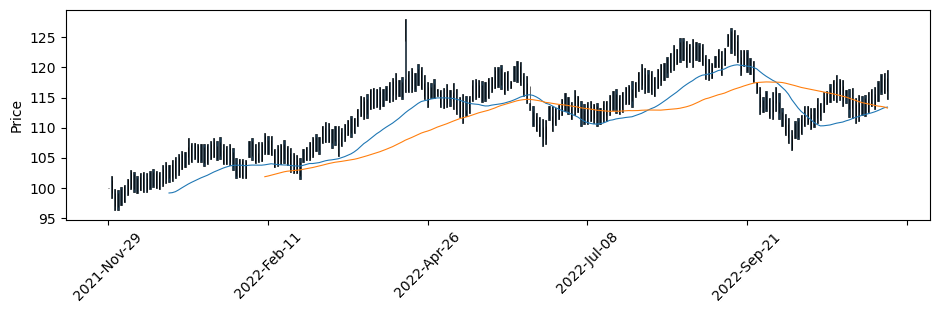

** KINDEX 미국WideMoat가치주 **
Ticker  : 309230
Market  : US
Type    : sector
MEAN +/-: -1 %
MAX/MIN : 108 / 89
RANGE.  : 19
PV      : 102


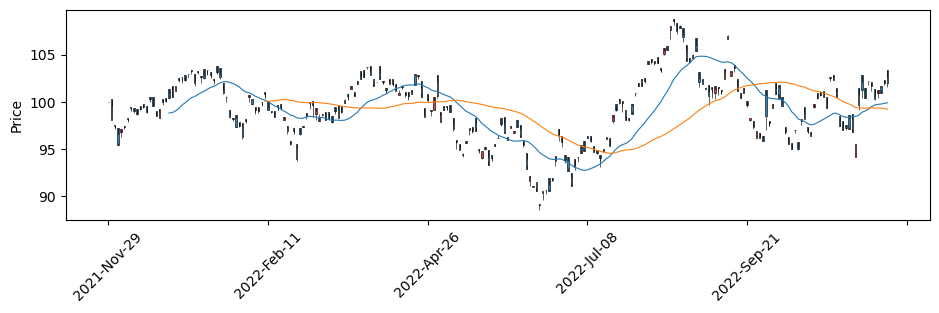

** TIGER 글로벌클라우드컴퓨팅INDXX **
Ticker  : 371450
Market  : US
Type    : sector
MEAN +/-: -26 %
MAX/MIN : 100 / 60
RANGE.  : 40
PV      : 64


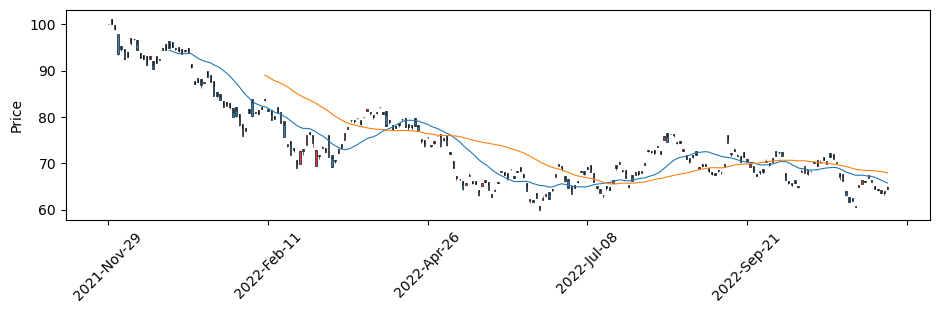

** KOSEF 미국방어배당성장나스닥 **
Ticker  : 373790
Market  : US
Type    : sector
MEAN +/-: 10 %
MAX/MIN : 122 / 96
RANGE.  : 26
PV      : 115


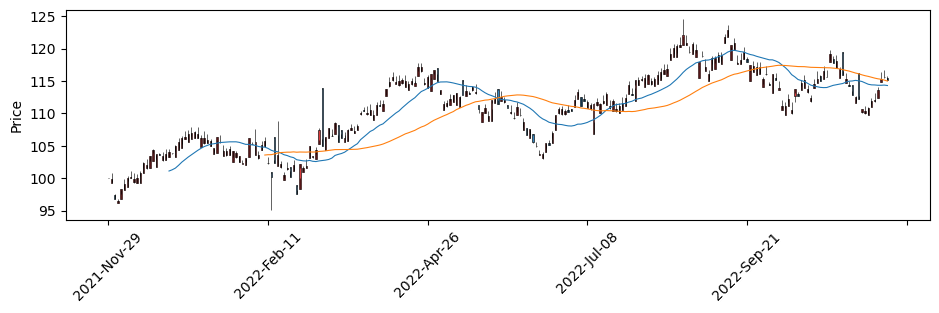

** KODEX 미국메타버스나스닥액티브 **
Ticker  : 411420
Market  : US
Type    : sector
MEAN +/-: -26 %
MAX/MIN : 103 / 60
RANGE.  : 43
PV      : 64


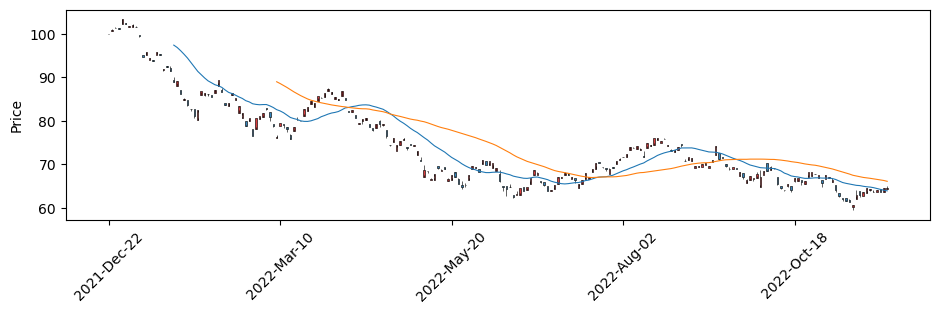

** 삼성 미국 대형 가치주 ETN **
Ticker  : 530020
Market  : US
Type    : sector
MEAN +/-: 9 %
MAX/MIN : 121 / 94
RANGE.  : 27
PV      : 119


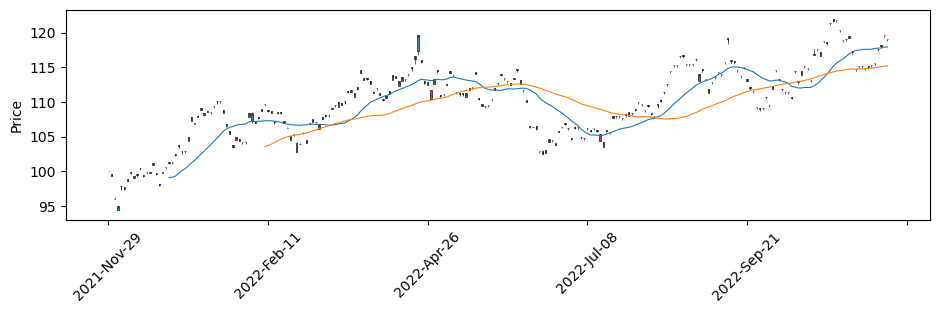

** 삼성전자 **
Ticker  : 005930
Market  : KR
Type    : stock
MEAN +/-: -10 %
MAX/MIN : 111 / 72
RANGE.  : 39
PV      : 84


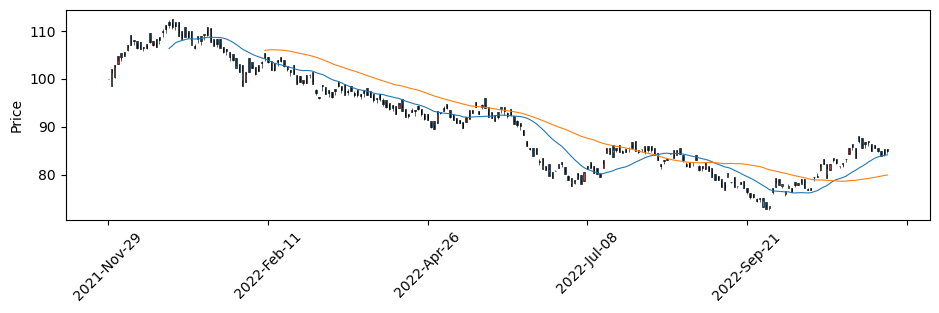

** SK하이닉스 **
Ticker  : 000660
Market  : KR
Type    : stock
MEAN +/-: -9 %
MAX/MIN : 114 / 69
RANGE.  : 45
PV      : 74


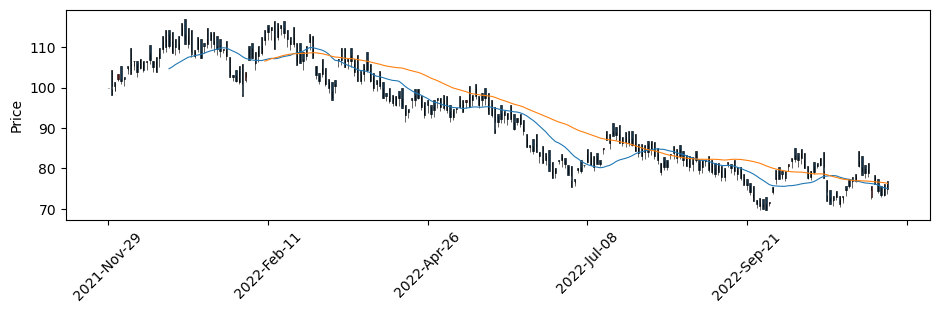

** NAVER **
Ticker  : 035420
Market  : KR
Type    : stock
MEAN +/-: -29 %
MAX/MIN : 104 / 41
RANGE.  : 63
PV      : 48


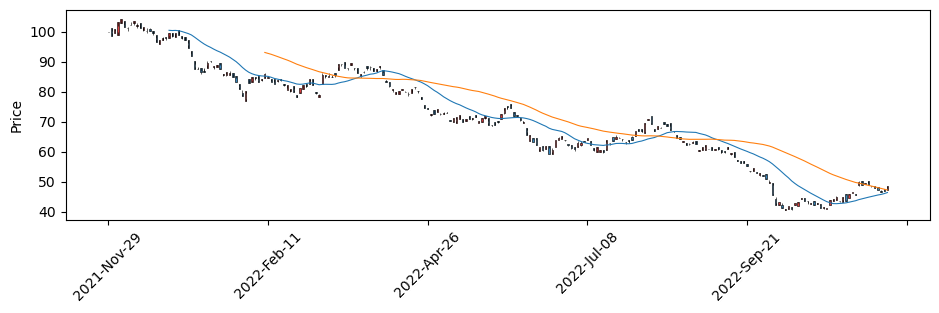

** 맥쿼리인프라 **
Ticker  : 088980
Market  : KR
Type    : stock
MEAN +/-: -8 %
MAX/MIN : 100 / 73
RANGE.  : 27
PV      : 78


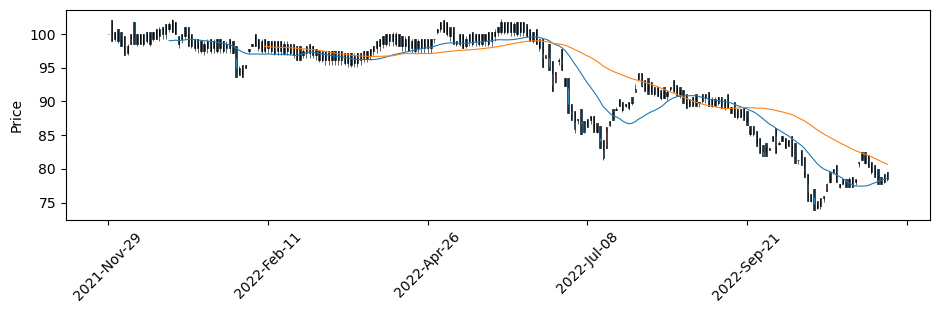

In [4]:
daydelta = 360   # 조회될 기간 설정. 일 기준
today = datetime.today()

start = (today + timedelta(days= -1 * daydelta)).strftime('%Y-%m-%d')
end = today.strftime('%Y-%m-%d')

print('---------------------------------------------')
print('최근', daydelta, '일 데이터 조회', '- MA 20d, 50d')
print('---------------------------------------------')
print()

l_perf = []
for i, row in ticker.sort_values(['TYPE', 'MARKET', 'POSITION']).iterrows():
    try:
        if row.MONITOR:
            data = web.naver.NaverDailyReader(row.TICKER, start= start, end= end).read().astype('int')
            data = data / data.iloc[0] * 100
            cmean = int(data.Close.mean()) - 100
            cmax = int(data.Close.max())
            cmin = int(data.Close.min())
            rng = cmax - cmin
            cpv = int(data.Close[-1])
            l_perf.append([row.TICKER, row.NAME, row.MARKET, row.TYPE, cmean, cmax, cmin, rng, cpv])
            
            print('**', row.NAME, '**')
            print('Ticker  :', row.TICKER)
            print('Market  :', row.MARKET)
            print('Type    :', row.TYPE)
            print('MEAN +/-:', cmean, '%')
            print('MAX/MIN :', cmax, '/', cmin)
            print('RANGE.  :', rng)
            print('PV      :', cpv)
            fig, axlist = mpf.plot(data, type='candle', style= s, figsize= (12, 3), returnfig= True, mav=(20, 50))

        # Annotation
#         for pi, prow in position.loc[position.TICKER == row.TICKER].iterrows():
#             if data.index[0] < pd.to_datetime(prow.DATE):
#                 x = data.reset_index().index[data.index == prow.DATE].item()
# #                 y = data.loc[data.index == prow.DATE, 'Close'].item()
#                 y = prow.PRICE
#                 cap = str(prow.CAP * -1)
#                 stocks = str(prow.STOCKS)
#                 sb = 'SELL' if prow.SELL else 'BUY'
#                 axlist[0].annotate(sb + ', ' + stocks, (x, y), xytext=(x, y*0.95), arrowprops= dict(arrowstyle='->'))
            plt.show()
    except:
        print('************* ERROR on', row.NAME)
        pass
    
performance = pd.DataFrame(data= l_perf, columns= ['TICKER', 'NAME', 'MARKET', 'TYPE', 'MEAN+/-', 'MAX', 'MIN', 'RNG', 'PV'])
performance.set_index(['TICKER'], inplace= True)

In [5]:
performance.sort_values(by= ['PV'], ascending= True)

,NAME,MARKET,TYPE,MEAN+/-,MAX,MIN,RNG,PV
TICKER,,,,,,,,
510006,대신 인버스 니켈선물 ETN(H),Global,commodity,-44,104,28,76,37
035420,NAVER,KR,stock,-29,104,41,63,48
157490,TIGER 소프트웨어,KR,sector,-31,102,44,58,53
371460,TIGER 차이나전기차SOLACTIVE,CN,sector,-25,100,53,47,61
411420,KODEX 미국메타버스나스닥액티브,US,sector,-26,103,60,43,64
371450,TIGER 글로벌클라우드컴퓨팅INDXX,US,sector,-26,100,60,40,64
500058,신한 S&P500 VIX S/T 선물 ETN C,US,index,-7,127,69,58,69
590018,미래에셋 중국 심천 100 ETN,CN,sector,-14,103,72,31,72
000660,SK하이닉스,KR,stock,-9,114,69,45,74


In [6]:
performance.sort_values(by= ['RNG'], ascending= True)

,NAME,MARKET,TYPE,MEAN+/-,MAX,MIN,RNG,PV
TICKER,,,,,,,,
570049,TRUE S&P500 양매도 4% OTM ETN(H),US,index,3,109,97,12,99
360750,KBSTAR Fn수소경제테마,KR,sector,-4,103,86,17,97
332610,ARIRANG 미국단기우량회사채,US,bond,5,116,98,18,108
241180,TIGER 일본니케이225,JP,index,-9,101,83,18,92
309230,KINDEX 미국WideMoat가치주,US,sector,-1,108,89,19,102
319640,TIGER 골드선물(H),Global,commodity,-1,111,89,22,96
200250,KOSEF 인도Nifty50(합성),Global,index,1,112,90,22,106
139280,TIGER 경기방어,KR,sector,-10,102,78,24,87
266410,KODEX 필수소비재,KR,sector,-7,104,79,25,88


In [7]:
performance.sort_values(by= ['MIN'], ascending= True)

,NAME,MARKET,TYPE,MEAN+/-,MAX,MIN,RNG,PV
TICKER,,,,,,,,
510006,대신 인버스 니켈선물 ETN(H),Global,commodity,-44,104,28,76,37
035420,NAVER,KR,stock,-29,104,41,63,48
157490,TIGER 소프트웨어,KR,sector,-31,102,44,58,53
371460,TIGER 차이나전기차SOLACTIVE,CN,sector,-25,100,53,47,61
371450,TIGER 글로벌클라우드컴퓨팅INDXX,US,sector,-26,100,60,40,64
411420,KODEX 미국메타버스나스닥액티브,US,sector,-26,103,60,43,64
510004,대신 인버스 아연선물 ETN(H),Global,commodity,-15,103,63,40,92
510018,대신 인버스 알루미늄 선물 ETN(H),Global,commodity,-6,120,64,56,102
195980,ARIRANG 신흥국MSCI(합성 H),Global,index,-14,103,67,36,76
